In [1]:
from skimage.io import imread
from sklearn.neighbors import KDTree
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from instapipeline import QuantiusAnnotation, SpotAnnotationAnalysis, autocrop, clus, param, util, vis

%load_ext autoreload
%autoreload 2

In [2]:
img_filename = 'MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5_spot_img.png'
img_filepath = './datasets/%s' % img_filename
csv_filepath = './datasets/MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5_coord_snr_list.csv'
json_filepath = './datasets/SynthTests_tissue.json'
clustering_params = ['AffinityPropagation', -350]
img_height = len(imread(img_filepath))

In [3]:
qa = QuantiusAnnotation(json_filepath, img_filename)
sa = SpotAnnotationAnalysis(qa)
anno_all = qa.df()
clusters = sa.get_clusters(anno_all, clustering_params)        

In [4]:
correct_list, incorrect_list, total_list, threshold = param.sort_clusters_by_correctness(clusters=clusters, 
                                                                                   correctness_threshold=4, 
                                                                                   csv_filepath=csv_filepath, 
                                                                                   img_height=img_height)

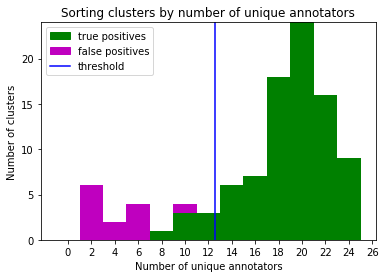

In [5]:
width = 2
plt.figure()
plt.hist([correct_list, incorrect_list], bins = np.arange(0,max(total_list)+width, width)-width/2, stacked = True, color = ['g','m'])
plt.axvline(x=threshold, color='b')
g_patch = mpatches.Patch(color='g', label='true positives')
m_patch = mpatches.Patch(color='m', label='false positives')
kmeans_line = Line2D([0],[0], color='b', label='threshold')
plt.legend(handles=[g_patch, m_patch, kmeans_line])
plt.xlabel("Number of unique annotators")
plt.xticks(np.arange(0,max(total_list)+width, width))
plt.ylabel("Number of clusters")
plt.title('Sorting clusters by number of unique annotators')
plt.savefig("fig_2a.pdf", transparent=True, bbox_inches = "tight")
plt.show()